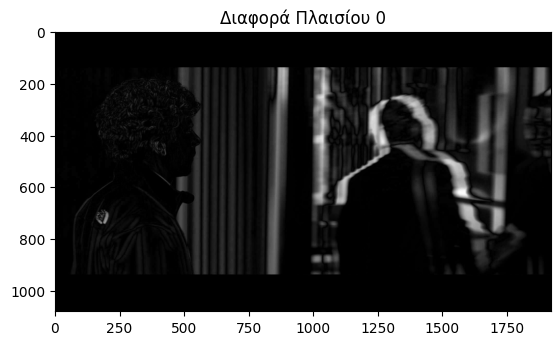

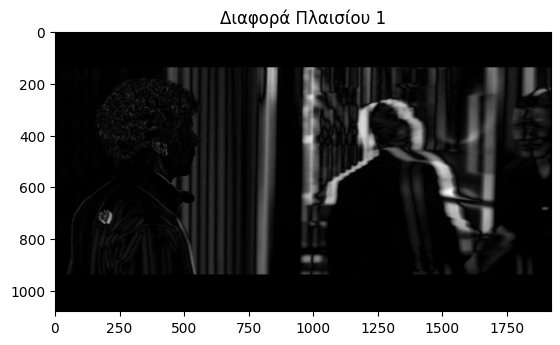

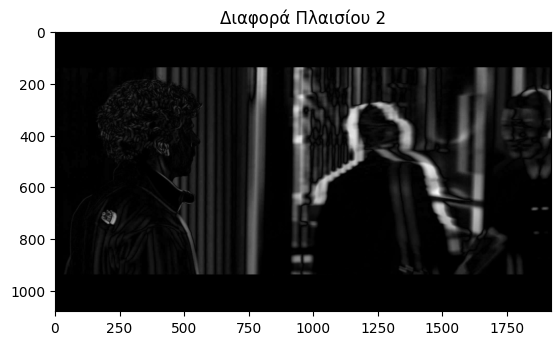

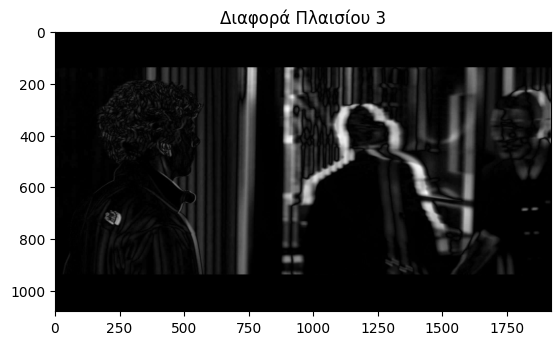

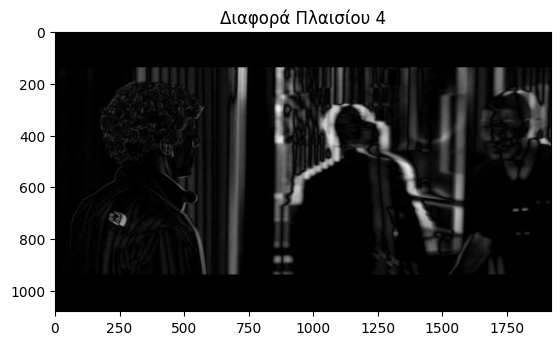

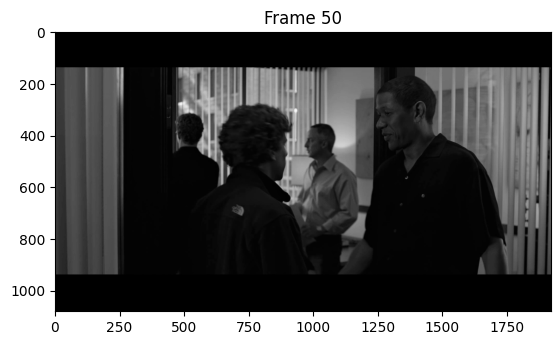

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def extract_frames(video_path, output_dir="frames"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    cap = cv2.VideoCapture(video_path)
    frames = []

    idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)
        cv2.imwrite(f"{output_dir}/frame_{idx:03d}.png", gray)
        idx += 1
    cap.release()
    return np.array(frames)

frames = extract_frames("3076_THE_SOCIAL_NETWORK_01.33.57.154-01.34.01.880.avi")

def frame_differences(frames):
    diffs = []
    for i in range(1, len(frames)):
        diff = cv2.absdiff(frames[i], frames[i-1])
        diffs.append(diff)
    return np.array(diffs)
diffs = frame_differences(frames)

for i in range(5): 
    plt.imshow(diffs[i], cmap='gray')
    plt.title(f"Διαφορά Πλαισίου {i}")
    plt.show()

plt.imshow(frames[50], cmap='gray')  # 50ο πλαίσιο
plt.title("Frame 50")
plt.show()


In [7]:
from collections import Counter

flat_diffs = diffs.flatten()
print(flat_diffs[:20])

freq = Counter(flat_diffs)
print(freq)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Counter({0: 127335482, 1: 30299941, 2: 14554072, 3: 9259020, 4: 6708252, 5: 5140201, 6: 4225903, 7: 3843975, 8: 2922704, 9: 2431504, 10: 2146308, 11: 1961316, 12: 1771229, 13: 1604664, 14: 1513274, 15: 1221976, 16: 1037727, 17: 922435, 18: 867782, 19: 810847, 20: 764133, 21: 746829, 22: 648878, 23: 569095, 24: 514301, 25: 498540, 26: 477880, 28: 461383, 27: 459251, 29: 407382, 30: 356256, 31: 323673, 32: 319121, 33: 309452, 35: 300834, 34: 298850, 36: 277227, 37: 249612, 38: 228945, 39: 225821, 40: 223371, 41: 219335, 42: 216660, 43: 193921, 44: 171649, 46: 156926, 45: 156042, 47: 152835, 49: 152584, 48: 151159, 50: 143799, 51: 127625, 54: 113684, 53: 112710, 52: 112161, 55: 111819, 56: 111375, 57: 106377, 58: 95478, 63: 89178, 62: 85738, 61: 85665, 59: 84911, 60: 84123, 64: 81555, 65: 71253, 66: 59079, 67: 55844, 71: 55736, 69: 55727, 68: 55336, 70: 54619, 72: 49395, 75: 46660, 74: 45643, 73: 44270, 76: 43977, 77: 43069, 78: 41655, 79: 36510, 

In [8]:
import heapq
from collections import Counter

def compute_huffman_dict(data):
    # Υπολογισμός συχνοτήτων για κάθε σύμβολο
    freq = Counter(data)
    
    # Δημιουργία ουράς προτεραιότητας (heap)
    heap = [[weight, [symbol, ""]] for symbol, weight in freq.items()]
    heapq.heapify(heap)

    # Δημιουργία του κώδικα Huffman
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    
    # Το αποτέλεσμα είναι το λεξικό κωδικών Huffman
    return dict(sorted(heap[0][1:], key=lambda p: (len(p[-1]), p)))

# Υπολογισμός του λεξικού Huffman
huff_dict = compute_huffman_dict(flat_diffs)

# Εκτύπωση του λεξικού Huffman για τις πιο συχνές τιμές
print("Λεξικό Huffman για τις πιο συχνές τιμές:")
for symbol, code in list(huff_dict.items())[:20]:
    print(f"Σύμβολο: {symbol}, Κώδικας: {code}")

# Υπολογισμός μεγέθους ροής Huffman (σε bits)
huff_size = sum(len(huff_dict[symbol]) * freq[symbol] for symbol in freq)

# Υπολογισμός του μεγέθους χωρίς συμπίεση (σε bits)
original_size = flat_diffs.size * 8

# Υπολογισμός του λόγου συμπίεσης
compression_ratio = original_size / huff_size

# Εκτύπωση αποτελεσμάτων
print(f"Αρχικό μέγεθος (σε bits): {original_size}")
print(f"Μέγεθος μετά τη συμπίεση (σε bits): {huff_size}")
print(f"Λόγος συμπίεσης: {compression_ratio}")


Λεξικό Huffman για τις πιο συχνές τιμές:
Σύμβολο: 0, Κώδικας: 1
Σύμβολο: 1, Κώδικας: 010
Σύμβολο: 2, Κώδικας: 0110
Σύμβολο: 3, Κώδικας: 0000
Σύμβολο: 4, Κώδικας: 00110
Σύμβολο: 5, Κώδικας: 00011
Σύμβολο: 6, Κώδικας: 011110
Σύμβολο: 7, Κώδικας: 011100
Σύμβολο: 8, Κώδικας: 001001
Σύμβολο: 9, Κώδικας: 000100
Σύμβολο: 10, Κώδικας: 0111110
Σύμβολο: 11, Κώδικας: 0111010
Σύμβολο: 12, Κώδικας: 0011100
Σύμβολο: 13, Κώδικας: 0010110
Σύμβολο: 14, Κώδικας: 0010100
Σύμβολο: 15, Κώδικας: 0001010
Σύμβολο: 16, Κώδικας: 01110110
Σύμβολο: 17, Κώδικας: 00111101
Σύμβολο: 18, Κώδικας: 00101111
Σύμβολο: 19, Κώδικας: 00101110
Αρχικό μέγεθος (σε bits): 1874534400
Μέγεθος μετά τη συμπίεση (σε bits): 690429588
Λόγος συμπίεσης: 2.7150261700545775


In [9]:
def motion_compensation(ref_frame, target_frame, block_size=8, search_range=4):
    height, width = ref_frame.shape
    predicted_frame = np.zeros_like(ref_frame)
    motion_vectors = []

    for y in range(0, height, block_size):
        for x in range(0, width, block_size):
            best_match = (0, 0)
            min_error = float('inf')

            # Current block in target frame
            target_block = target_frame[y:y+block_size, x:x+block_size]

            # Search in reference frame within window
            for dy in range(-search_range, search_range + 1):
                for dx in range(-search_range, search_range + 1):
                    ref_y = y + dy
                    ref_x = x + dx

                    # Check boundaries
                    if ref_y < 0 or ref_y + block_size > height or ref_x < 0 or ref_x + block_size > width:
                        continue

                    ref_block = ref_frame[ref_y:ref_y+block_size, ref_x:ref_x+block_size]
                    error = np.sum(np.abs(target_block - ref_block))  # SAD

                    if error < min_error:
                        min_error = error
                        best_match = (dy, dx)

            # Apply best match to predicted frame
            ref_y = y + best_match[0]
            ref_x = x + best_match[1]
            predicted_frame[y:y+block_size, x:x+block_size] = ref_frame[ref_y:ref_y+block_size, ref_x:ref_x+block_size]
            motion_vectors.append(((y, x), best_match))

    return predicted_frame, motion_vectors

In [10]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

predicted_frames = []
motion_vectors_all = []

def extract_frames(video_path, output_dir="frames"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    cap = cv2.VideoCapture(video_path)
    frames = []

    idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)
        cv2.imwrite(f"{output_dir}/frame_{idx:03d}.png", gray)
        idx += 1
    cap.release()
    return np.array(frames)

frames = extract_frames("3076_THE_SOCIAL_NETWORK_01.33.57.154-01.34.01.880.avi")[:5]

for i in range(1, len(frames)):
    predicted, vectors = motion_compensation(frames[i-1], frames[i], block_size=8, search_range=4)
    predicted_frames.append(predicted)
    motion_vectors_all.append(vectors)


In [11]:
from collections import Counter

motion_diffs = [cv2.absdiff(frames[i+1], predicted_frames[i]) for i in range(len(predicted_frames))]
motion_diffs = np.array(motion_diffs)
flat_motion_diffs = motion_diffs.flatten()

# Huffman όπως και πριν
freq = Counter(flat_motion_diffs)
huff_dict = compute_huffman_dict(flat_motion_diffs)
huff_size = sum(len(huff_dict[symbol]) * freq[symbol] for symbol in freq)
original_size = flat_motion_diffs.size * 8
compression_ratio = original_size / huff_size

print(f"[Motion Comp] Αρχικό μέγεθος (σε bits): {original_size}")
print(f"[Motion Comp] Συμπιεσμένο μέγεθος (σε bits): {huff_size}")
print(f"[Motion Comp] Λόγος συμπίεσης: {compression_ratio}")


[Motion Comp] Αρχικό μέγεθος (σε bits): 66355200
[Motion Comp] Συμπιεσμένο μέγεθος (σε bits): 31938332
[Motion Comp] Λόγος συμπίεσης: 2.0776038022273675


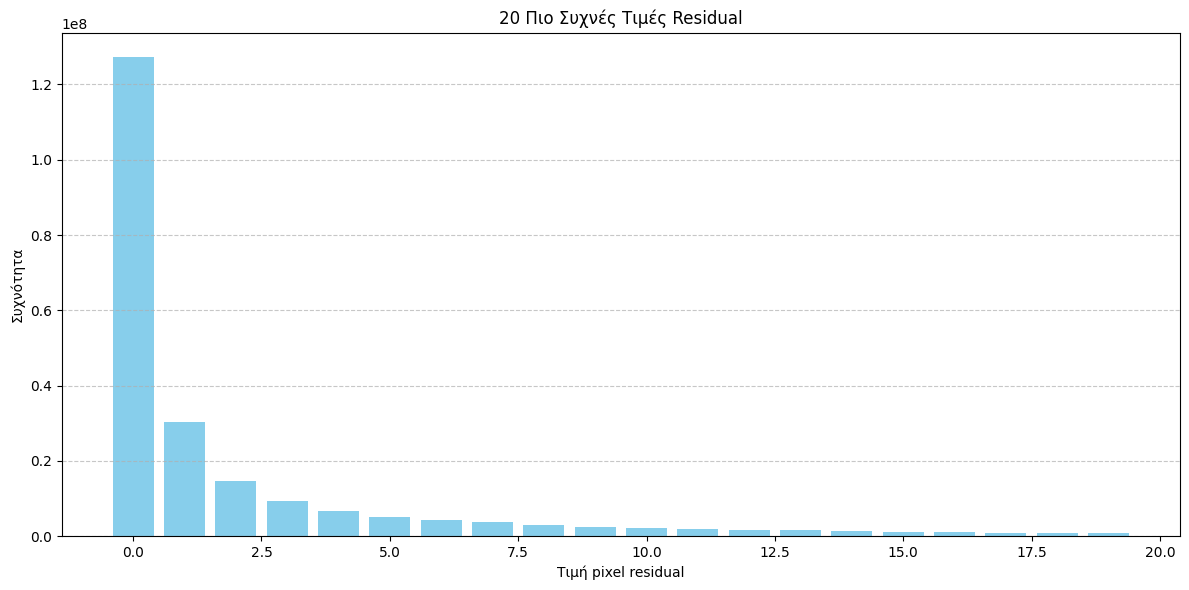

In [1]:
import matplotlib.pyplot as plt
from collections import Counter

# Δείγμα του λεξικού που είχες (μπορείς να βάλεις το δικό σου Counter εδώ)
freqs = Counter({
    0: 127335482, 1: 30299941, 2: 14554072, 3: 9259020, 4: 6708252, 5: 5140201,
    6: 4225903, 7: 3843975, 8: 2922704, 9: 2431504, 10: 2146308, 11: 1961316,
    12: 1771229, 13: 1604664, 14: 1513274, 15: 1221976, 16: 1037727, 17: 922435,
    18: 867782, 19: 810847
})

# Πάρε τα 20 πιο συχνά
top_items = freqs.most_common(20)
values = [item[0] for item in top_items]
counts = [item[1] for item in top_items]

# Πλοκή
plt.figure(figsize=(12, 6))
plt.bar(values, counts, color='skyblue')
plt.title("20 Πιο Συχνές Τιμές Residual")
plt.xlabel("Τιμή pixel residual")
plt.ylabel("Συχνότητα")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


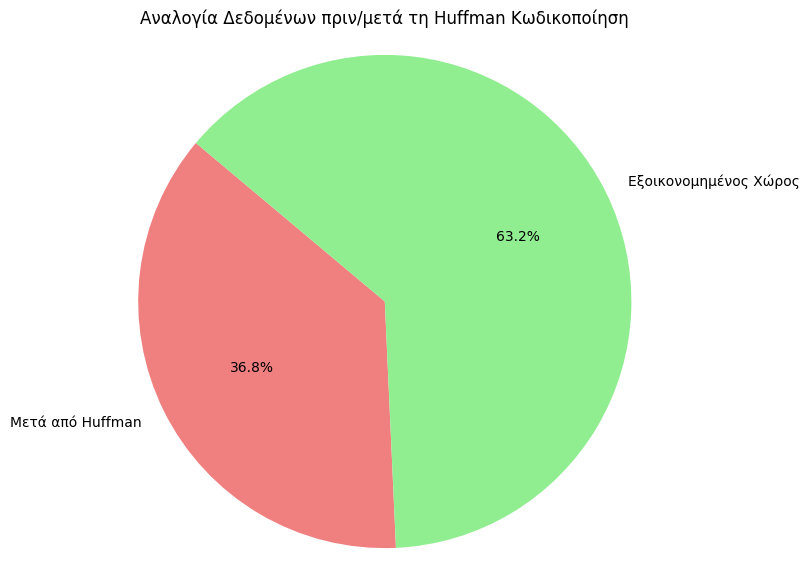

In [2]:
# Αρχικό και συμπιεσμένο μέγεθος (σε bits)
original_bits = 1874534400
compressed_bits = 690429588
saved_bits = original_bits - compressed_bits

# Δεδομένα για γράφημα
sizes = [compressed_bits, saved_bits]
labels = ['Μετά από Huffman', 'Εξοικονομημένος Χώρος']
colors = ['lightcoral', 'lightgreen']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Αναλογία Δεδομένων πριν/μετά τη Huffman Κωδικοποίηση')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


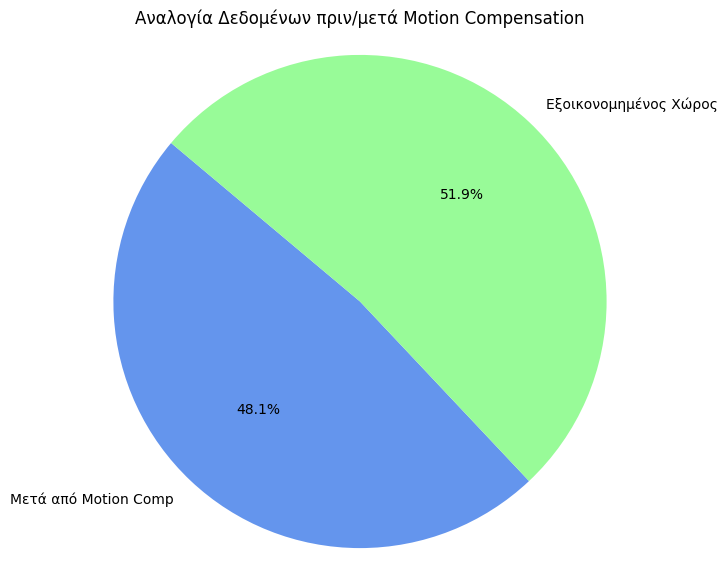

In [3]:
# Δεδομένα
original_mc = 66355200
compressed_mc = 31938332
saved_mc = original_mc - compressed_mc

sizes = [compressed_mc, saved_mc]
labels = ['Μετά από Motion Comp', 'Εξοικονομημένος Χώρος']
colors = ['cornflowerblue', 'palegreen']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Αναλογία Δεδομένων πριν/μετά Motion Compensation')
plt.axis('equal')
plt.show()


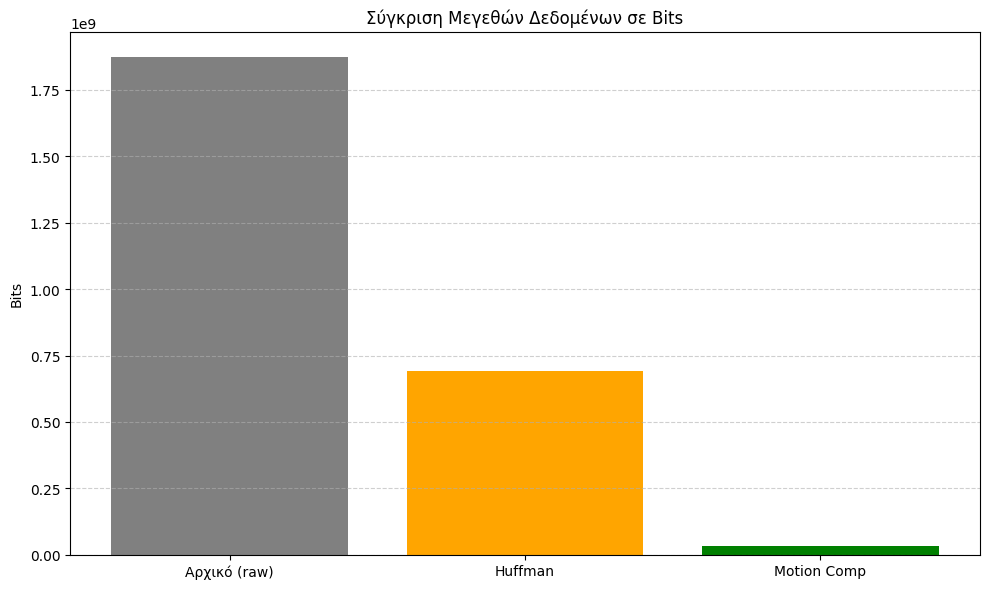

In [4]:
labels = ['Αρχικό (raw)', 'Huffman', 'Motion Comp']
sizes = [1874534400, 690429588, 31938332]

plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=['gray', 'orange', 'green'])
plt.title('Σύγκριση Μεγεθών Δεδομένων σε Bits')
plt.ylabel('Bits')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
